<a href="https://colab.research.google.com/github/dennisli8246/Machine-Leaning/blob/main/Tensor_test_7_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST手寫數字辨識

總共有訓練數據6萬張，測試數據1萬張

step 1:匯入套件

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import matplotlib.pyplot as plt


step 2:設定亂數種子

In [ ]:
torch.manual_seed(0)

step 3:定義轉換函數，用torchvision模組將圖片轉換成張量

In [ ]:
transform=transforms.Compose([transforms.ToTensor()])#經過transform會把0~255轉乘0~1


step 4:讀取數據及，並且轉換成張量

In [ ]:
train_data=datasets.MNIST('data/',train=True,download=True,transform=transform)
test_data=datasets.MNIST('data/',train=True,download=False,transform=transform)

step 5:查詢訓練集及測試集的數據形狀

In [ ]:
train_x=train_data.data
train_y=train_data.targets
test_x=test_data.data
test_y=test_data.targets

print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)


torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([60000, 28, 28]) torch.Size([60000])


step 6:查看第0筆圖片的形狀

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([28, 28])
torch.Size([1, 28, 28])


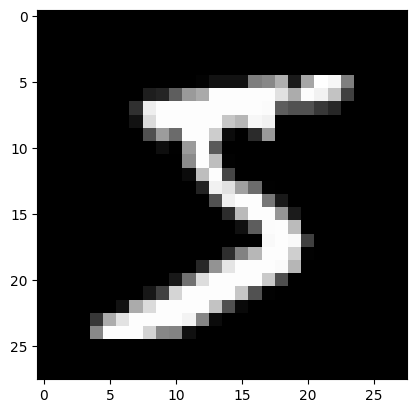

In [ ]:
image=train_data.train_data[0]
plt.imshow(image.numpy(), cmap = 'gray')
print(image.shape)

img,label =train_data[0]
print(img.shape)
#torch.Size([1, 28, 28])(通道,高,寬)因為是黑白所以只有1個通道

step 7:查看圖片的最小像素值及最大像素值

In [ ]:
print(img.min(),img.max())
print(image.min(),image.max())

tensor(0.) tensor(1.)
tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)


step 8:顯字第0筆圖片

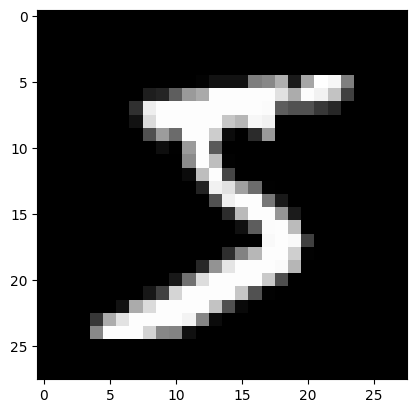

In [ ]:
img2=img.permute(1,2,0) #由於Dataset圖片為(C,H,W)要轉成shape(H,W,C)才能讓matplotlib顯示圖片
plt.imshow(img2,cmap='gray')

step 9:印出第0筆影像的標籤

In [ ]:
print(label)

5


step 10:建立DataLoader

In [ ]:
train_dataloader=DataLoader(train_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=500,shuffle=False)

step 11:定義CNN模型

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet,self).__init__()
    self.cn1=nn.Conv2d(1,16,3,1)#通道數，輸出通道核數(有多少片的捲積核)，kernel_size，stride(步數)
    self.cn2=nn.Conv2d(16,32,3,1)
    self.dp1=nn.Dropout(0.10)#丟棄綠10%
    self.dp2=nn.Dropout(0.25)#丟棄綠25%
    self.fc1=nn.Linear(12*12*32,64)#feature_in,feature_out
    self.fc2=nn.Linear(64,10)
  def forward(self,x):
    #以下是圖片的預先處理
    x=self.cn1(x)      #輸出圖片(C,H,W)=(16,26,26)
    x=F.relu(x)
    x=self.cn2(x)      #輸出圖片(C,H,W)=(32,24,24)
    x=F.relu(x)
    x=F.max_pool2d(x,2)   #池化#輸出圖片(C,H,W)=(32,12,12)
    x=torch.flatten(x,1)  #展平
    #以下就是神經網路
    x=self.fc1(x)      #linear layer
    x=self.dp1(x)      #dropout layer
    x=F.relu(x)       #activation function
    x=self.fc2(x)      #linear layer
    x=self.dp2(x)      #dropout layer
    op=F.log_softmax(x,dim=1)
    return op

step 12:建立模型實例，放到GPU/cpu

In [ ]:
device=torch.device('cpu')#'cpu'/'cuda:0'
model=ConvNet().to(device)

step 13:定義損失函數及最佳方法

In [ ]:
myloss=nn.NLLLoss()
myoptim=optim.Adadelta(model.parameters(),lr=0.1)

step 14:定義train()副程式，用來訓練

In [ ]:
def train(model,device,train_dataloader,myloss,myoptim,epoch):
  model.train()
  for b_i,(X,y) in enumerate(train_dataloader):
    X,y=X.to(device),y.to(device)
    pred_prob=model(X)
    loss=myloss(pred_prob,y)

    myoptim.zero_grad()
    loss.backward()
    myoptim.step()

    if b_i%200 == 0:
      num1=b_i*len(X)
      num2=len(train_dataloader.dataset)
      num3=100*b_i/len(train_dataloader)
      print('epoch:{}[{}/{}({:.0f}%)]\t training loss:{:.6f}'.format(epoch,num1,num2,num3,loss.item()))

step 15:執行3個訓練回合

In [ ]:
epochs=3
for epoch in range(epochs):
  train(model,device,train_dataloader,myloss,myoptim,epoch)

epoch:0[0/60000(0%)]	 training loss:0.317319
epoch:0[6400/60000(11%)]	 training loss:0.146253
epoch:0[12800/60000(21%)]	 training loss:0.435647
epoch:0[19200/60000(32%)]	 training loss:0.294540
epoch:0[25600/60000(43%)]	 training loss:0.356567
epoch:0[32000/60000(53%)]	 training loss:0.247070
epoch:0[38400/60000(64%)]	 training loss:0.348587
epoch:0[44800/60000(75%)]	 training loss:0.507517
epoch:0[51200/60000(85%)]	 training loss:0.244883
epoch:0[57600/60000(96%)]	 training loss:0.298453
epoch:1[0/60000(0%)]	 training loss:0.283964
epoch:1[6400/60000(11%)]	 training loss:0.285634
epoch:1[12800/60000(21%)]	 training loss:0.348085
epoch:1[19200/60000(32%)]	 training loss:0.134696
epoch:1[25600/60000(43%)]	 training loss:0.433822
epoch:1[32000/60000(53%)]	 training loss:0.300083
epoch:1[38400/60000(64%)]	 training loss:0.303889
epoch:1[44800/60000(75%)]	 training loss:0.335317
epoch:1[51200/60000(85%)]	 training loss:0.268229
epoch:1[57600/60000(96%)]	 training loss:0.295368
epoch:2[0/60

step 16:儲存模型

In [ ]:
from google.colab import drive#google colab會把檔案讀到google drive中 #沒有上傳才執行
# 將自己的雲端硬碟掛載上去
drive.mount('/content/drive')#連結自己的雲端硬碟

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 透過 gdrive/My Drive/... 來存取檔案
torch.save(model.state_dict(),"/content/drive/My Drive/Colab Notebooks/mnist_model.pt")


step 17:載入模型

In [ ]:
model2=ConvNet()
model2.load_state_dict(torch.load("/content/drive/My Drive/Colab Notebooks/mnist_model.pt"))
model2=model2.to(device)


step 18:定義test()副程式，已用測試模型

In [ ]:
def test(model,device,test_dataloader,myloss):
  model.eval()
  loss=0
  success=0
  with torch.no_grad():
    for X,y in test_dataloader:
      X,y=X.to(device),y.to(device)
      pred_prob=model(X)
      loss+=myloss(pred_prob,y).item()

      pred=pred_prob.argmax(dim=1,keepdim=True)
      success += pred.eq(y.view_as(pred)).sum().item()

      num1= loss/len(test_dataloader)
      num2= len(test_dataloader.dataset)
      num3=100*success/len(test_dataloader.dataset)
      print('Overall Loss:{:.4f},Overall Accuracy:{}/{}({:.2f}%)'.format(num1,success,num2,num3))

step 19:測試模型

In [ ]:
test(model2,device,test_dataloader,myloss)

Overall Loss:0.0003,Overall Accuracy:494/60000(0.82%)
Overall Loss:0.0006,Overall Accuracy:990/60000(1.65%)
Overall Loss:0.0007,Overall Accuracy:1487/60000(2.48%)
Overall Loss:0.0009,Overall Accuracy:1986/60000(3.31%)
Overall Loss:0.0009,Overall Accuracy:2484/60000(4.14%)
Overall Loss:0.0013,Overall Accuracy:2979/60000(4.96%)
Overall Loss:0.0013,Overall Accuracy:3479/60000(5.80%)
Overall Loss:0.0014,Overall Accuracy:3974/60000(6.62%)
Overall Loss:0.0017,Overall Accuracy:4468/60000(7.45%)
Overall Loss:0.0017,Overall Accuracy:4968/60000(8.28%)
Overall Loss:0.0020,Overall Accuracy:5465/60000(9.11%)
Overall Loss:0.0021,Overall Accuracy:5962/60000(9.94%)
Overall Loss:0.0024,Overall Accuracy:6457/60000(10.76%)
Overall Loss:0.0025,Overall Accuracy:6956/60000(11.59%)
Overall Loss:0.0027,Overall Accuracy:7453/60000(12.42%)
Overall Loss:0.0029,Overall Accuracy:7951/60000(13.25%)
Overall Loss:0.0031,Overall Accuracy:8448/60000(14.08%)
Overall Loss:0.0035,Overall Accuracy:8942/60000(14.90%)
Overal

step 20: 取出影像測試

In [ ]:
model2=model2.to("cpu")
sample_data,sample_targets=next(iter(test_dataloader))
print(sample_data.shape)

torch.Size([500, 1, 28, 28])


step 21: 顯示第10筆的影像

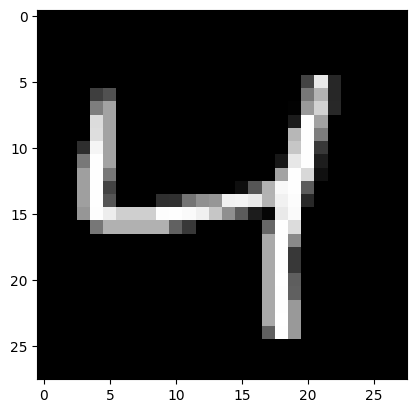

In [ ]:
plt.imshow(sample_data[2][0],cmap='gray')

step 22: 預測標籤

In [ ]:
pred_label=model2(sample_data).max(dim=1)[1][2]
print(pred_label)

tensor(4)


step 23: 顯示真實標籤與預測標籤

In [ ]:
print(f"Model prediction is :{pred_label}")
print(f"Ground truth is:{sample_targets[2]}")

Model prediction is :4
Ground truth is:4
